# Titanic Survival Analysis


In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('whitegrid')

In [4]:
# reading the titanic dataset into notebook

train = pd.read_csv('../input/titanicdataset-traincsv/train.csv')

In [5]:
# checking the top 5 rows of the dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Definitions**


* PassengerId - Unique Id of each passenger on the ship
* Survived - '0' for not survived & '1' for survived
* Pclass - Passenger class: '1' for 1st class, '2' for 2nd class & '3' for 3rd class
* Name - Passenger name
* Sex - Passenger gender: 'male' or 'female'
* Age - Passenger age
* SibSp - No. of siblings or spouses aborded Titanic together with the passenger
* Parch - No. of parents or children aborded Titanic together with the passenger
* Ticket - Passenger ticket number
* Fare - Passenger ticket fare
* Cabin - Passenger cabin number
* Embarked - Encoded name of city passenger embarked

In [6]:
# General information on the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Statistical information on the dataset

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **EDA**

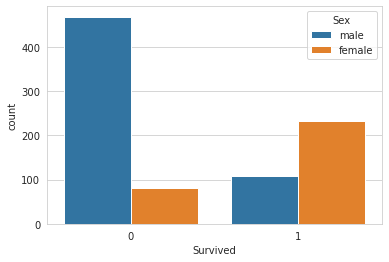

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [9]:
# Probability of survival on both female and male

train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


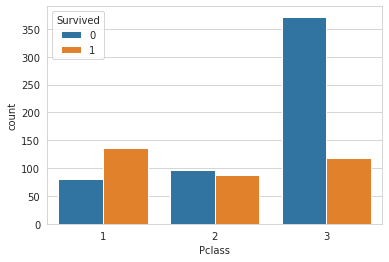

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=train)

In [11]:
# Probability of survival on the passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


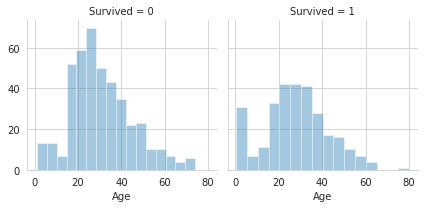

In [12]:
# Histogram depicting different ages with survival

g = sns.FacetGrid(data=train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

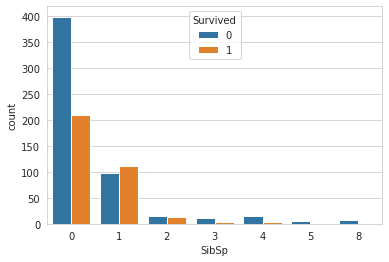

In [13]:
# Number of siblings or spouses

sns.countplot(x='SibSp', hue='Survived', data=train)

In [14]:
# Probability of survival

train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


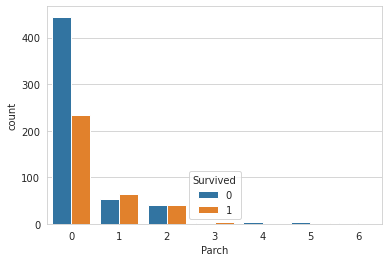

In [15]:
# Parents and children

sns.countplot(x='Parch', hue='Survived', data=train)

In [16]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [17]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

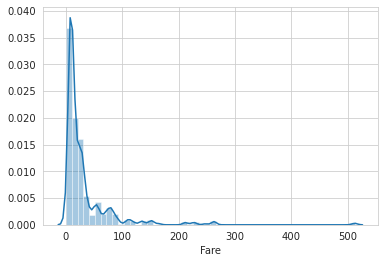

In [18]:
sns.distplot(train['Fare'], bins=50)

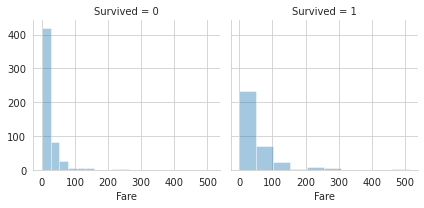

In [19]:
g = sns.FacetGrid(data=train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False, bins=10)

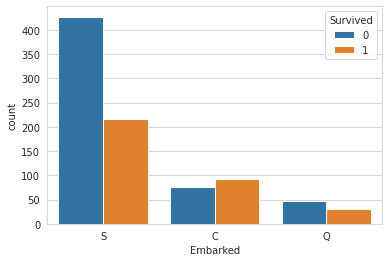

In [20]:
sns.countplot(x='Embarked',hue='Survived', data=train)

In [21]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


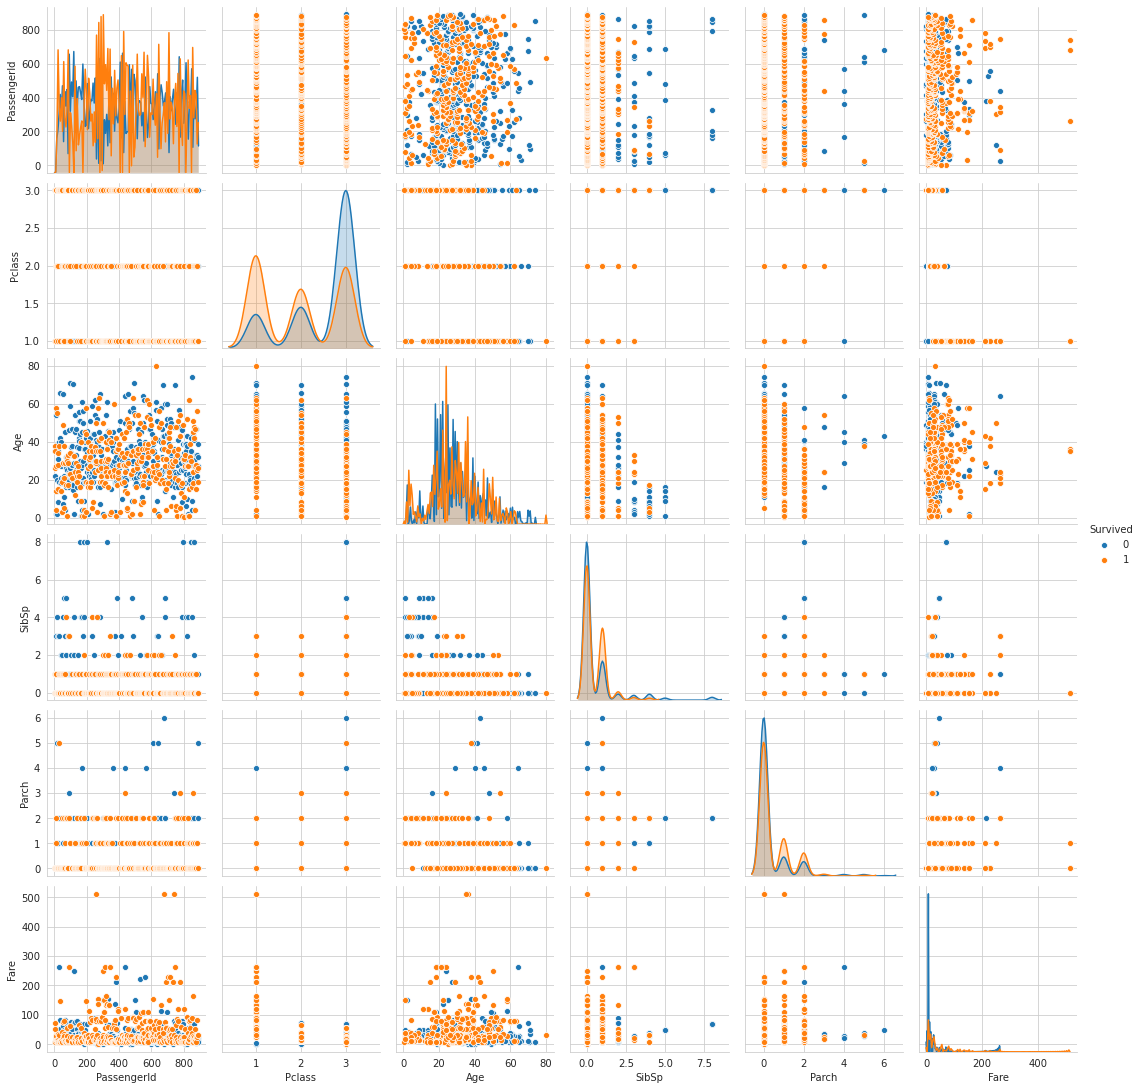

In [22]:
sns.pairplot(train, hue='Survived', diag_kws={'bw': 0.2})

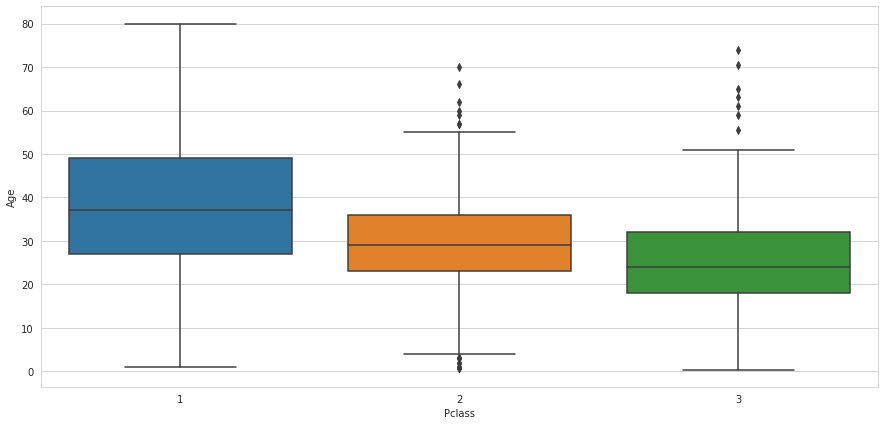

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Pclass', y='Age', data=train)

### **Observation**

Since the Age column has some null values, we can use the above boxplot to fill up those null values 

## **Handling Missing values**

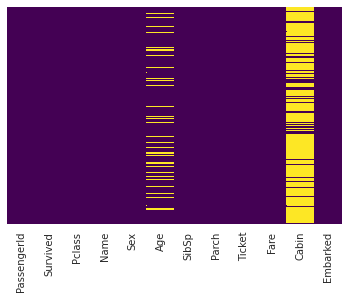

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The dataset has many null values from Age column to Cabin and Embarked, we will try to either fill up those null values or drop the column.

In [25]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


The Age column has 177 null or NaN values, since it is a small number and it has a good relationship whith Pclass column we will try to fill up those values with in relation to Pclass.

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else: 
        return age

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [26]:
by_sex_class = train.groupby(['Sex', 'Pclass'])

In [27]:
def impute_median(series):
    return series.fillna(series.median())

In [28]:
train['Age'] = by_sex_class['Age'].transform(impute_median)

In [29]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Now the Age column has been filled with some useful info with in elation with Pclass column, next is the Embarked column.

In [30]:
# filling up the null values with the top most common category

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [31]:
train['Embarked'].isnull().any()

False

In [32]:
train[train['PassengerId'] == 830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


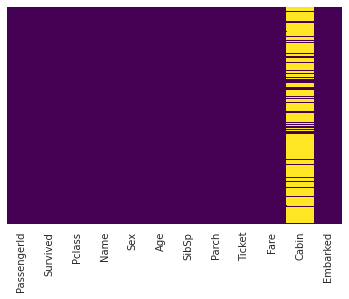

In [33]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

All the null values have been filled except Cabin column, which has a huge amount of null values we will drop the column itself.

In [34]:
train.drop('Cabin', axis=1, inplace=True)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## **Feature selection and converting categorical feature into numerical data**

We will also drop the column which are not continuous or categorical.

In [36]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Converting the categorical columns into dummy columns.
the pd.get_dummies() takes a column which has multiple categories,
and creates a column wise representation for those categories by assigning numbers.

In [38]:
Sex = pd.get_dummies(train['Sex'], drop_first=True)

In [39]:
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [40]:
Pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [41]:
# As we have our dummy variables, we will drop the existing columns and replace them with our dummy variables.

train.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

In [42]:
# concatenating the dummy variables to the dataset

train = pd.concat([train, Sex, Embarked, Pclass], axis=1)

In [43]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## **Training and Testing**

In [44]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

Splitting the dataset into 70-30 for training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
# we will use a simple logistic regression model

from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [50]:
predictions = logmodel.predict(X_test)

Let's see how our model did against the data

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [53]:
print(confusion_matrix(y_test, predictions))

[[135  19]
 [ 38  76]]


Predicted No:Actual No: 135

Predicted No:Actual Yes: 38

Predicted Yes:Actual No: 19

Predicted Yes:Actual Yes: 76

In [54]:
print(accuracy_score(y_test, predictions) * 100)

78.73134328358209
